In [96]:
#To make these codes to work apply these:
#Enter to channels from Anaconda Navigator. Add "www.conda.anaconda.org".
#Run Anaconda Power Shell as admin.
#Download python3 and pip (if you have them already,no need to re-download).
#Download tensorflow library with "pip install tensorflow" command in Anaconda Power Shell.
#Download the keras library with "pip install keras" command in Anaconda Power Shell.

In [97]:
#The problem:
#Build an ANN structure by using MNIST train data to predict the MNIST handwritten digits.
#You will use MNIST test data to evaluate your trained ANN structure in terms of 
#evaluation metrics that are accuracy and F1 score.
#Train your ANN structure with activation functions that are sigmoid, ReLU, and tanh separately.
#Use the same activation functions in hidden layer and output layer for your ANN structure. 
#Add the convergence curve of your ANN structure along iterations.
#Explain your ANN structure in terms of the included number of neurons in hidden layer and output layer.
#Explain which value of learning rate is used for your ANN structure.
#Explain which activation function provides the highest or the lowest classification performance

In [98]:
#Keras is used for quickly experimenting with deep neural networks
import numpy as np #For matrix operations
import matplotlib.pyplot as plt #For plotting to the screen
from keras.layers import Dense, Flatten #For layers in our model
from keras.models import Sequential #For modeling ann
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist #We upload our csv train and test files from keras

In [99]:
# Load MNIST handwritten digit data from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [100]:
# Convert y_train into one-hot format
#One-hot encoding: change the values as they are 
#either 1 or 0 to work with categorical data directly
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
    
y_train = np.array(temp)

In [101]:
# Convert y_test into one-hot format 
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)

In [102]:
#We will create 3 different models seperately
# with using sigmoid,ReLu and tanh functions
#to compare each one of them with others

#For Sigmoid
# Create simple Neural Network model
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(5, activation='sigmoid'))
model1.add(Dense(10, activation='sigmoid'))

model1.summary()

model1.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [103]:
#For Sigmoid
# Train the Neural Network model
history_sigmoid = model1.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))
#Our model works for 5 times and sets its values by backpropagation

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9329 - acc: 0.3856 - val_loss: 1.3006 - val_acc: 0.5720
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2020 - acc: 0.6710 - val_loss: 1.0610 - val_acc: 0.6723
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 1.0051 - acc: 0.7046 - val_loss: 0.8906 - val_acc: 0.7371
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8883 - acc: 0.7377 - val_loss: 0.8407 - val_acc: 0.7531
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8440 - acc: 0.7484 - val_loss: 0.8361 - val_acc: 0.7559


In [104]:
#For Sigmoid
# Making predictions using our trained model
predictions = model1.predict(X_test)
predictions = np.argmax(predictions, axis=1)

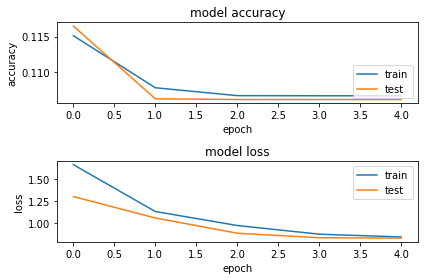

In [105]:
#For Sigmoid
# plotting the convergence curve
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_sigmoid.history['loss'])
plt.plot(history_sigmoid.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

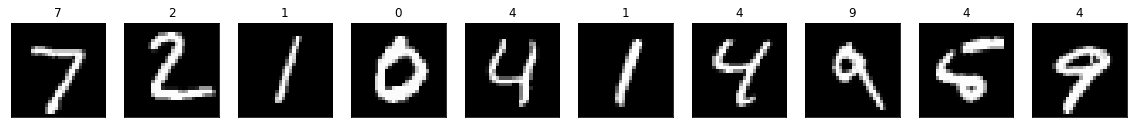

In [106]:
#For Sigmoid
# Display predictions on test data for
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

In [107]:
#For ReLu
# Create simple Neural Network model
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(5, activation='relu'))
model2.add(Dense(10, activation='relu'))

model2.summary()

model2.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_27 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [108]:
#For ReLu
# Train the Neural Network model
history_relu = model2.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))
#Our model works for 5 times and sets its values by backpropagation

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: nan - acc: 0.0999 - val_loss: nan - val_acc: 0.0980
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: nan - acc: 0.0956 - val_loss: nan - val_acc: 0.0980
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: nan - acc: 0.0988 - val_loss: nan - val_acc: 0.0980
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: nan - acc: 0.0985 - val_loss: nan - val_acc: 0.0980
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: nan - acc: 0.0995 - val_loss: nan - val_acc: 0.0980


In [109]:
#For ReLu
# Making predictions using our trained model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

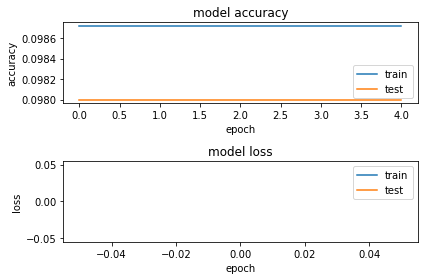

In [110]:
#For ReLu
# plotting the convergence curve
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_relu.history['acc'])
plt.plot(history_relu.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_relu.history['loss'])
plt.plot(history_relu.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

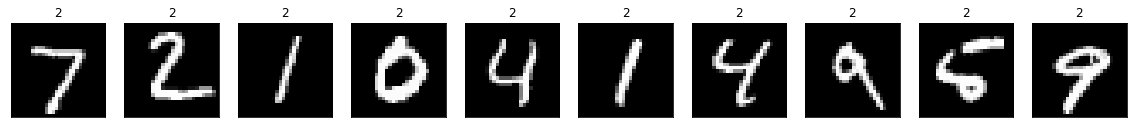

In [111]:
#For ReLu
# Display predictions on test data for
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

In [112]:
#For tanh
# Create simple Neural Network model
model3 = Sequential()
model3.add(Flatten(input_shape=(28,28)))
model3.add(Dense(5, activation='tanh'))
model3.add(Dense(10, activation='tanh'))

model3.summary()

model3.compile(loss='categorical_crossentropy', 
	      optimizer='adam',
	      metrics=['acc'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_29 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [113]:
#For tanh
# Train the Neural Network model
history_tanh = model3.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))
#Our model works for 5 times and sets its values by backpropagation

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 7.2507 - acc: 0.1178 - val_loss: 8.1289 - val_acc: 0.0779
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 8.1318 - acc: 0.0804 - val_loss: 9.0361 - val_acc: 0.1786
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 7.3788 - acc: 0.1458 - val_loss: 6.6229 - val_acc: 0.1062
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 6.6932 - acc: 0.1043 - val_loss: 6.6181 - val_acc: 0.1050
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 6.9244 - acc: 0.1084 - val_loss: 7.8916 - val_acc: 0.1020


In [114]:
#For tanh
# Making predictions using our trained model
predictions = model3.predict(X_test)
predictions = np.argmax(predictions, axis=1)

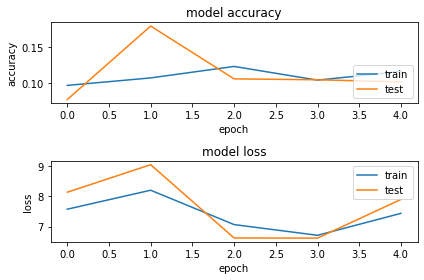

In [115]:
#For tanh
# plotting the convergence curve
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_tanh.history['acc'])
plt.plot(history_tanh.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_tanh.history['loss'])
plt.plot(history_tanh.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

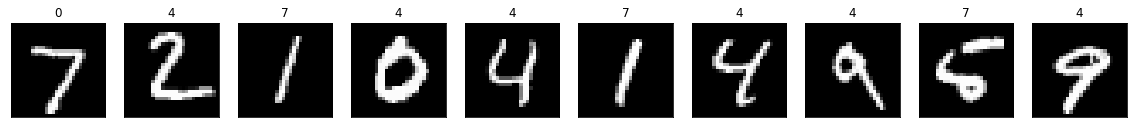

In [116]:
#For ReLu
# Display predictions on test data for
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()

In [117]:
#Summary:

#tanh is superior than sigmoid always. ReLu and tanh perform different depend on the model.
#ReLu is commonly prefered because it is lot easier to understand and apply especially for deep learning(multi layer ann).

#tanh is a logistic function. The range of the tanh function is from (-1 to 1).
#Advantage of the tanh : Negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero.
#The range of ReLu is from (0 to infinity).
#Advantage of the ReLu: Activation is sparse and efficient.
#It should only be used within Hidden layers of a Neural Network Model.

#In the model the learning rate a is 0,01 default value.
#